In [8]:
from __future__ import division

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
#import mltools as ml
import time


np.random.seed(0)
%matplotlib inline

In [9]:
X = np.genfromtxt('data/X_train.txt', delimiter=None)
Y = np.genfromtxt('data/Y_train.txt', delimiter=None)
X = shuffle(X)
Y = shuffle(Y)

In [10]:
for f in range(X.shape[1]):
    print "Feature #{:3d}".format(f+1)
    print "    min:      {}".format(min(X[:,f]))
    print "    max:      {}".format(max(X[:,f]))
    print "    mean:     {}".format(np.mean(X[:,f]))
    print "    variance: {}".format(np.var(X[:,f]))

Feature #  1
    min:      193.5
    max:      253.0
    mean:     241.6011037
    variance: 83.4991711498
Feature #  2
    min:      152.5
    max:      249.0
    mean:     227.3765713
    variance: 92.625593125
Feature #  3
    min:      214.25
    max:      252.5
    mean:     241.5541505
    variance: 35.2863398033
Feature #  4
    min:      152.5
    max:      252.5
    mean:     232.82676815
    variance: 97.6257317486
Feature #  5
    min:      10.0
    max:      31048.0
    mean:     3089.923365
    variance: 15651513.7564
Feature #  6
    min:      0.0
    max:      13630.0
    mean:     928.25902
    variance: 3081761.81695
Feature #  7
    min:      0.0
    max:      9238.0
    mean:     138.09383
    variance: 443951.746446
Feature #  8
    min:      0.0
    max:      125.17
    mean:     3.2485793303
    variance: 8.21948502491
Feature #  9
    min:      0.87589
    max:      19.167
    mean:     6.49865290275
    variance: 6.40504819136
Feature # 10
    min:      0.0
    

so yeah this is just the reading input part done...

In [11]:
X_train = pd.read_csv('data/X_train.txt', sep= " ",header = None)
Y_train = pd.read_csv('data/Y_train.txt', sep= " ",header = None)
X_test = pd.read_csv('data/X_test.txt', sep= " ",header = None)
train = X_train.copy(deep=True)
train["result"] = Y_train
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,242.0,227.0,240.92,232.44,1195.0,253.0,0.0,1.26710,6.4128,1.98690,3.9756,2.3392,6.3537,0.0
1,249.0,230.0,242.31,233.68,1579.0,243.0,0.0,9.68310,6.0824,1.19640,3.4577,2.0416,7.6746,0.0
2,223.0,195.0,227.64,204.42,1034.0,603.0,318.0,1.52860,17.8690,13.23000,5.7120,4.7216,6.6030,0.0
3,234.0,221.0,236.27,229.73,7716.0,3907.0,0.0,0.60465,8.0497,3.44760,2.4845,1.5741,1.4205,0.0
4,234.0,233.0,245.51,234.10,545.0,21.0,0.0,6.74730,5.2649,0.86766,5.9626,4.2450,3.1429,24.2


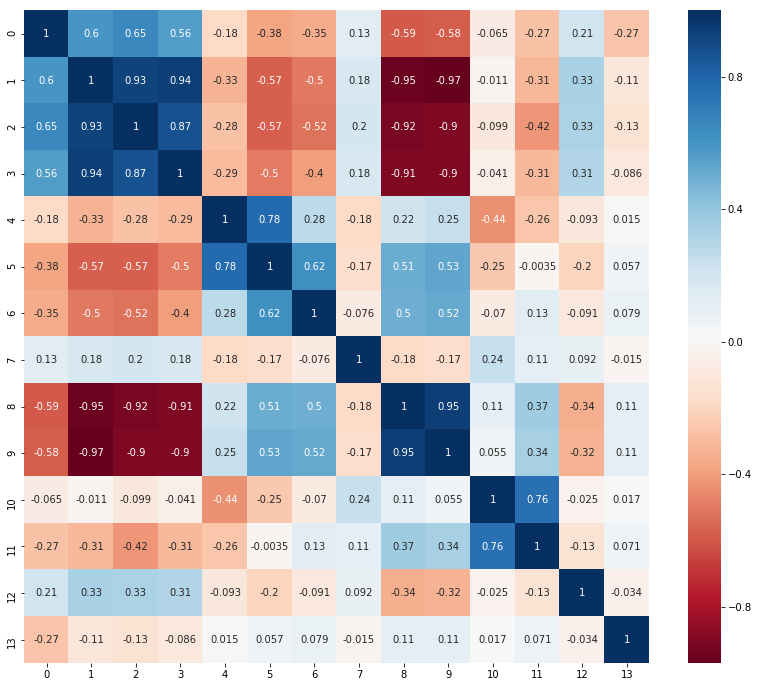

In [12]:
import seaborn as sns
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
#plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(X_train.astype(float).corr(),cmap=colormap, annot=True)

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
'''
for i in range(7, 32,1):
    print("Depth:",i)
    random_forest = RandomForestClassifier(max_depth = i)
    random_forest.fit(X_train,Y_train)
    cv = ShuffleSplit(n_splits=4,random_state=0)
    scores = cross_val_score(random_forest, X_train, Y_train, cv=cv)
    
    print("Scores:",scores)
random_forest = RandomForestClassifier(max_depth = 23)
random_forest.fit(X_train,Y_train)
Y_pred1 = random_forest.predict(X_test)
acc_rf = round(random_forest.score(X_train,Y_train)*100,2)
acc_rf
submission = pd.DataFrame({ 'ID': list(id),
                            'Prob1': Y_pred1 })
submission.to_csv("submission3.csv",index=False)
'''

'\nfor i in range(7, 32,1):\n    print("Depth:",i)\n    random_forest = RandomForestClassifier(max_depth = i)\n    random_forest.fit(X_train,Y_train)\n    cv = ShuffleSplit(n_splits=4,random_state=0)\n    scores = cross_val_score(random_forest, X_train, Y_train, cv=cv)\n    \n    print("Scores:",scores)\nrandom_forest = RandomForestClassifier(max_depth = 23)\nrandom_forest.fit(X_train,Y_train)\nY_pred1 = random_forest.predict(X_test)\nacc_rf = round(random_forest.score(X_train,Y_train)*100,2)\nacc_rf\nsubmission = pd.DataFrame({ \'ID\': list(id),\n                            \'Prob1\': Y_pred1 })\nsubmission.to_csv("submission3.csv",index=False)\n'

/Users/junlinwang/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/junlinwang/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/Users/junlinwang/anaconda3/envs/py27/lib/python2.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/junlinwang/anaconda3/envs/py27/lib/python2.7/site-packages/numpy/core/_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


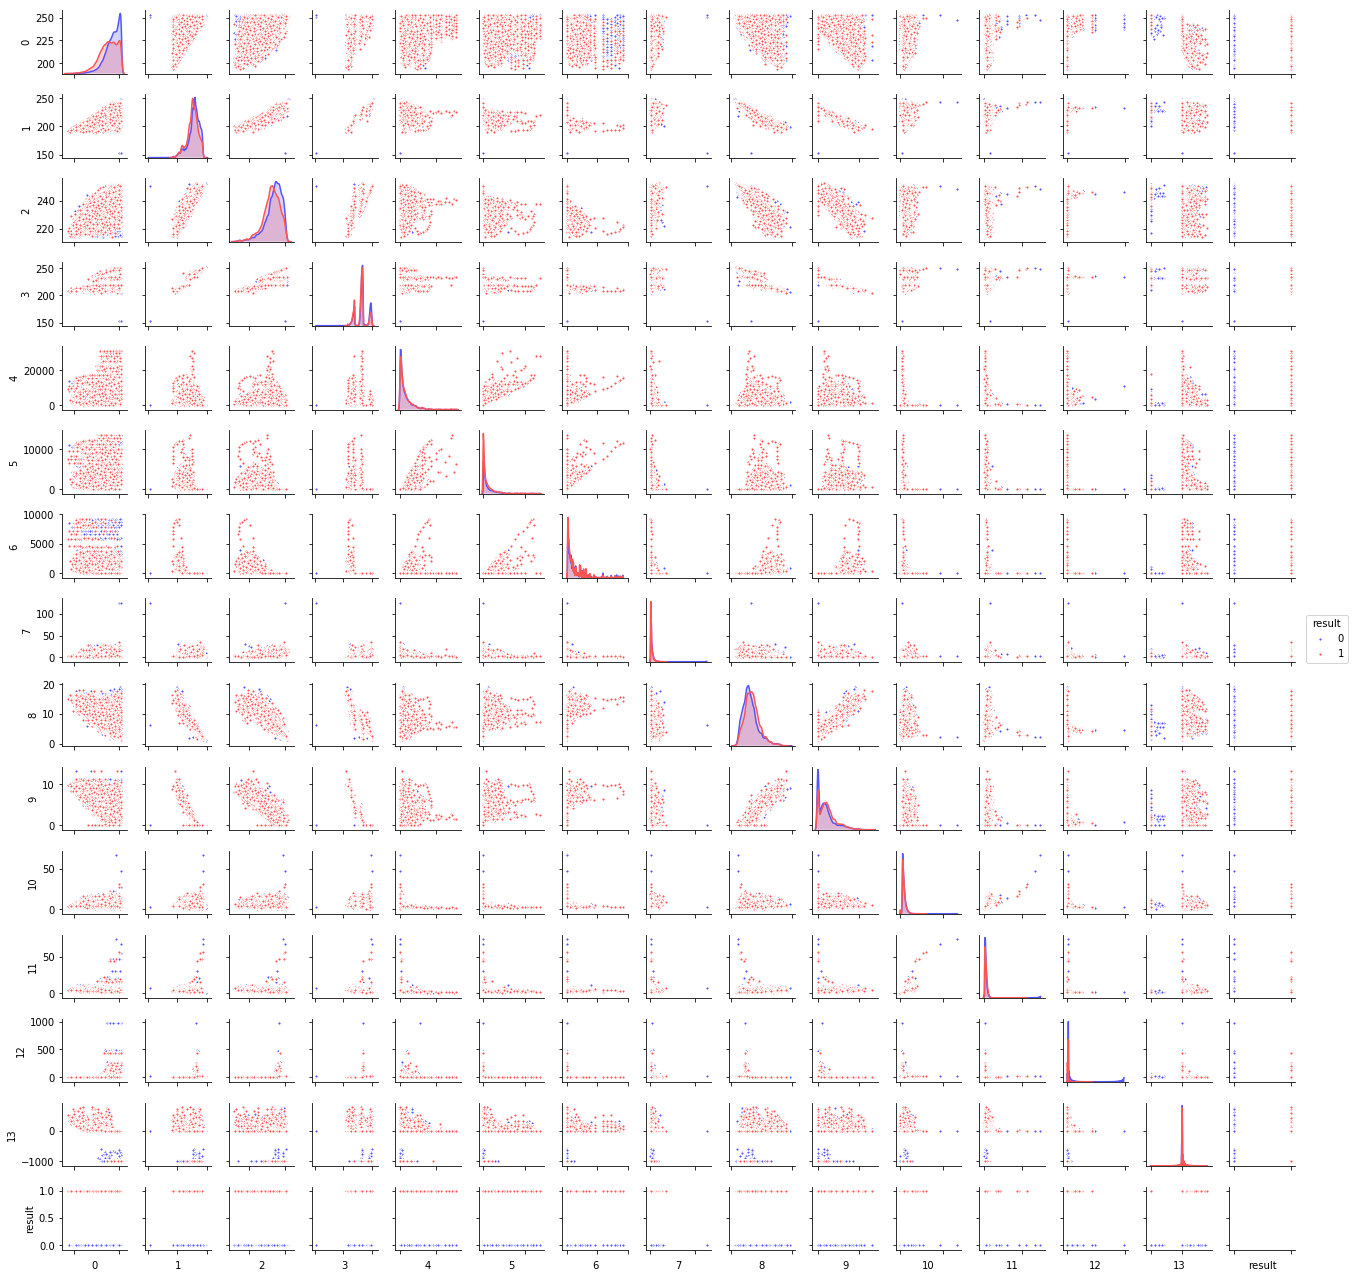

In [14]:
plt.figure(figsize=(14,20))
g = sns.pairplot(train, hue="result",palette = 'seismic',size=1.2,diag_kind = 'kde',diag_kws=dict(shade=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])

In [ ]:
from sklearn.ne
knn = 